In [20]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Aufar\Documents\edm\renfe.csv")
data = data.dropna()
data = data.head(100000)
data

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,AVE,68.95,Preferente,Promo
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo
...,...,...,...,...,...,...,...,...,...
223789,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 19:19:00,2019-05-24 21:59:00,INTERCITY,62.20,Turista,Flexible
223790,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 19:45:00,2019-05-24 22:17:00,AVE,60.30,Turista,Promo
223791,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 20:15:00,2019-05-24 22:36:00,AVE,53.40,Turista,Promo
223792,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 20:36:00,2019-05-24 23:14:00,ALVIA,67.20,Turista,Flexible


In [21]:
fareValue = []

for i in data.fare:
    if(i == "Promo +"):
        fareValue.append(1)
    elif(i == "Promo"):
        fareValue.append(2)
    elif(i == "Adulto ida"):
        fareValue.append(3)
    else:
        fareValue.append(4)

data["Fare Values"] = fareValue
data

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Fare Values
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,AVE,68.95,Preferente,Promo,2
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo,2
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo,2
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo,2
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo,2
...,...,...,...,...,...,...,...,...,...,...
223789,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 19:19:00,2019-05-24 21:59:00,INTERCITY,62.20,Turista,Flexible,4
223790,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 19:45:00,2019-05-24 22:17:00,AVE,60.30,Turista,Promo,2
223791,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 20:15:00,2019-05-24 22:36:00,AVE,53.40,Turista,Promo,2
223792,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 20:36:00,2019-05-24 23:14:00,ALVIA,67.20,Turista,Flexible,4


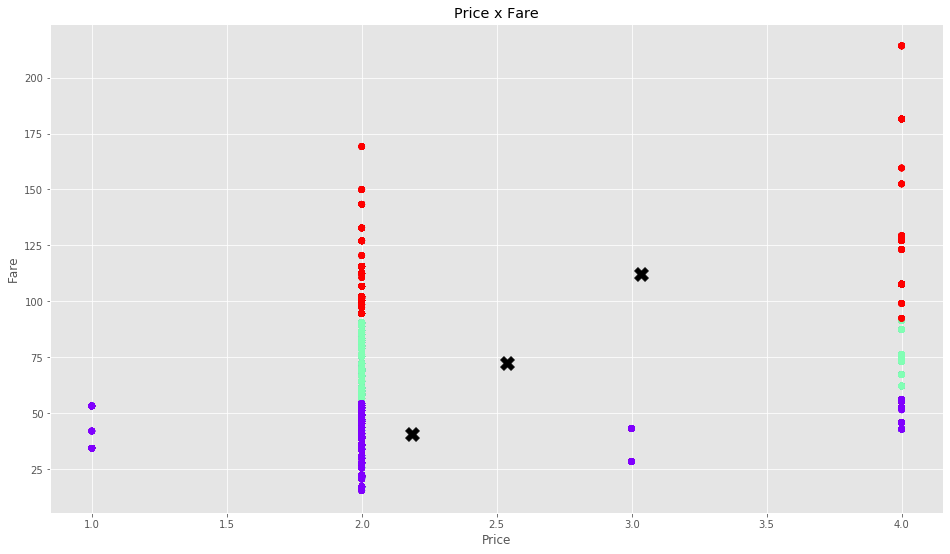

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

f1 = data['Fare Values'].values
f2 = data['price'].values
X = np.array(list(zip(f1, f2)))

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  

plt.title("Price x Fare")
plt.xlabel("Price")
plt.ylabel("Fare");

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="X", s=200)

In [36]:
Labels = kmeans.labels_ #pembeda A dan B
Labels

array([1, 1, 2, ..., 0, 1, 0])

In [38]:
Labeled = []
Count = []

Murah = 0
Normal = 0
Mahal = 0

for i in Labels:
    if(i == 0):
        Labeled.append("Murah")
        Murah += 1
    elif(i == 1):
        Labeled.append("Normal")
        Normal += 1
    else:
        Labeled.append("Mahal")
        Mahal += 1
        
data["Result"] = Labeled
Count.append(Murah)
Count.append(Normal)
Count.append(Mahal)

data

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Fare Values,Result
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,AVE,68.95,Preferente,Promo,2,Normal
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo,2,Normal
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo,2,Mahal
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo,2,Normal
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo,2,Normal
...,...,...,...,...,...,...,...,...,...,...,...
223789,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 19:19:00,2019-05-24 21:59:00,INTERCITY,62.20,Turista,Flexible,4,Normal
223790,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 19:45:00,2019-05-24 22:17:00,AVE,60.30,Turista,Promo,2,Normal
223791,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 20:15:00,2019-05-24 22:36:00,AVE,53.40,Turista,Promo,2,Murah
223792,2019-04-14 00:17:43,SEVILLA,MADRID,2019-05-24 20:36:00,2019-05-24 23:14:00,ALVIA,67.20,Turista,Flexible,4,Normal


Pie Plot Price x Fare : 


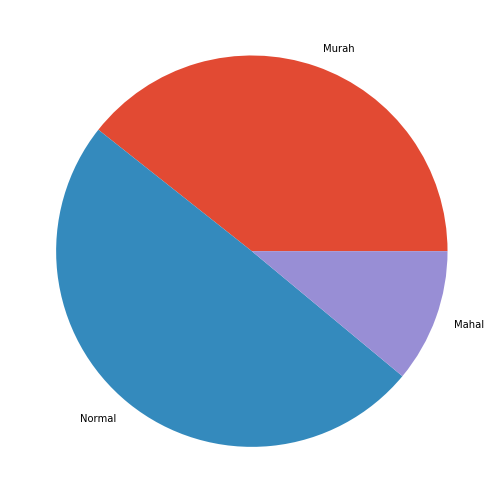

In [41]:
Label = ["Murah", "Normal", "Mahal"]

print("Pie Plot Price x Fare : ")
plt.pie(Count, labels=Label)
plt.show()